# Capstone - FEMA Hazard Mitigation Regression Analysis

**By Rachel Beery**

>**For my capstone I want to study community resilency and predict hazard mitigation success. I will be using the OpenFEMA datasets. My project will use supervised machine learning regression modeling to predict hazard mitigation success.**

>**In this project we are using a regression analysis model to understand the ROI of hazard mitigation costs in USD. By understanding these patterns we will then provide recommendations on how to better allocate hazard mitigation funds in the future.**

**Findings**
- Program Areas
    - More funds should be allocated to hazard mitigation in all categories of hazard mitigation with the HMGP being the program of highest ROI
- Regions
    - Certain areas of the US are more prone to natural disasters and need more funding for hazard mitigation including 1, 2, 4, and 9 having the best ROI
    - Regions 6 & 7 having the lowest ROI
- Program Costs & ROI
    - The costs of COVID-19 surpass all categories of natural disaster recovery costs and were unprecedented
        - There could have been further preparation and in the future more funding can be allocated to research and hazard mitigation for biological disasters. 

Open dataset Source: https://www.fema.gov/about/openfema/data-sets

### Goals: 
- Make a logistic regression to see what features yield the highest ROI in recovery funding. 
- Create visualizations that we can provide to a non-technical audience to use for use in future hazard mitigation funding activities. 
- Understand more about the regions of FEMA and how hazard mitigation is distributed amongst the US.

# Data Exploration and Cleaning

In [1]:
# We will begin by importing all of the packages we anticipate to use
import pandas as pd
import pandas.tseries  
import numpy as np  

import statsmodels.api as sm 
import itertools

import matplotlib.pyplot as plt   
from matplotlib.pylab import rcParams 
%matplotlib inline
import matplotlib.ticker as mtick
plt.style.use('ggplot') 
import plotly.express as px
import plotly.figure_factory as ff 
import plotly.graph_objects as go 
import seaborn as sns  

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore') 

import math
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
# CV - why not importing

from sklearn.feature_selection import VarianceThreshold, SelectFromModel
linreg = LinearRegression()

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [2]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows',)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Import data and see the headers
df = pd.read_csv(r"HazardMitigationAssistanceProjects - HazardMitigationAssistanceProjects.csv")
df.head()

,region,stateNumberCode,state,countyCode,county,programArea,projectIdentifier,projectType,projectTitle,projectCounties,numberOfProperties,numberOfFinalProperties,status,subgrantee,costSharePercentage,projectAmount,federalShareObligated,programFy,dateInitiallyApproved,dateApproved,dateClosed,granteeTribalIndicator,grantee,disasterNumber,benefitCostRatio,netValueBenefits,subgranteeTribalIndicator,hash,lastRefresh,id
0,6,48,Texas,167.000,Galveston,HMGP,DR-1999-0061-R,"400.1: Utility Protective Measures (Electric, ...",UTMB Elevation of Electrical Services Bldg 9,GALVESTON,0,0,Closed,UNIVERSITY OF TEXAS MEDICAL BRANCH,0.750,402910.000,302181.820,2011,2013-12-10T05:00:00.000Z,2020-02-06T05:00:00.000Z,2020-02-06T05:00:00.000Z,0.000,Statewide,1999.000,4.041,2969310.000,0.000,a959dc8cb69df0bd7f236b2021101501,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd79
1,5,18,Indiana,21.000,Clay,HMGP,DR-1997-0014-R,200.1: Acquisition of Private Real Property (S...,City of Brazil Phase 2,CLAY,13,6,Closed,Brazil,0.620,366071.000,227383.000,2011,2013-04-09T04:00:00.000Z,2019-11-25T05:00:00.000Z,2019-11-25T05:00:00.000Z,0.000,Statewide,1997.000,1.357,961452.000,0.000,cb8464b16e232b502ef9c8a3d385752b,2020-09-17T18:15:38.771Z,5f63a7ca31a8c6681c9dfd81
2,7,19,Iowa,153.000,Polk,HMGP,DR-1998-0022-P,91.1: Local Multihazard Mitigation Plan,Polk Countywide Multi-Jurisdiction Multi-Hazar...,POLK,0,0,Closed,Polk (County),0.750,96965.000,72724.000,2011,2012-05-10T04:00:00.000Z,2015-07-28T04:00:00.000Z,2015-07-29T04:00:00.000Z,0.000,Statewide,1998.000,0.000,0.000,0.000,bd467ece18ecc6c8a40b824175b7f029,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd84
3,2,36,New York,83.000,Rensselaer,HMGP,DR-4020-0064-F,600.1: Warning Systems (as a Component of a Pl...,Canal Flood Warning System,OSWEGO; ONTARIO; SARATOGA; SCHENECTADY; SCHOHA...,0,0,Closed,THRUWY AUTH/NYS CANAL CORP,1.000,5932500.000,5932500.000,2011,2013-11-12T05:00:00.000Z,2014-11-07T05:00:00.000Z,2018-01-24T05:00:00.000Z,0.000,Statewide,4020.000,0.000,0.000,0.000,ab6774d20b7cd64215ded6135377cc1e,2021-01-19T17:38:38.392Z,5f63a7ca31a8c6681c9dfd87
4,7,19,Iowa,141.000,O'Brien,HMGP,DR-1998-0013-F,600.1: Warning Systems (as a Component of a Pl...,Sheldon Outdoor Warning Sirens Project,O'BRIEN,0,0,Closed,Sheldon,0.750,34245.000,25683.000,2011,2012-05-03T04:00:00.000Z,2012-05-03T04:00:00.000Z,2013-09-26T04:00:00.000Z,0.000,Statewide,1998.000,0.000,0.000,0.000,62fff845e7929eb2587b530b69ae2f93,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd88


In [4]:
# How big is this dataset?
df.shape

(29628, 30)

In [5]:
# Looking to make sure out df is the correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 30 columns):
region                       29628 non-null int64
stateNumberCode              29628 non-null int64
state                        29628 non-null object
countyCode                   27586 non-null float64
county                       27586 non-null object
programArea                  29628 non-null object
projectIdentifier            29628 non-null object
projectType                  29301 non-null object
projectTitle                 29450 non-null object
projectCounties              27859 non-null object
numberOfProperties           29628 non-null int64
numberOfFinalProperties      29628 non-null int64
status                       29628 non-null object
subgrantee                   29133 non-null object
costSharePercentage          29608 non-null float64
projectAmount                29608 non-null float64
federalShareObligated        29628 non-null float64
programFy               

In [6]:
df.drop(axis=1, columns=['subgranteeTribalIndicator', 'lastRefresh', 
                         'dateInitiallyApproved', 'dateApproved', 
                         'dateClosed', 'projectTitle', 'numberOfFinalProperties', 'subgrantee', 
                         'projectIdentifier', 'projectCounties', 'numberOfProperties',
                        'status', 'costSharePercentage', 'federalShareObligated', 'grantee', 
                         'disasterNumber', 'hash', 'id', 
                         'state','county', 'countyCode', 'projectType'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 8 columns):
region                    29628 non-null int64
stateNumberCode           29628 non-null int64
programArea               29628 non-null object
projectAmount             29608 non-null float64
programFy                 29628 non-null int64
granteeTribalIndicator    22692 non-null float64
benefitCostRatio          29628 non-null float64
netValueBenefits          24707 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.8+ MB


In [7]:
df.describe()

,region,stateNumberCode,projectAmount,programFy,granteeTribalIndicator,benefitCostRatio,netValueBenefits
count,29628.000,29628.000,29608.000,29628.000,22692.000,29628.000,24707.000
mean,5.170,27.841,815798.371,2006.716,0.012,171.556,9907805.571
std,2.420,17.182,8021291.971,7.576,0.107,20368.674,808951961.855
min,1.000,1.000,-1624776.000,1989.000,0.000,0.000,0.000
25%,4.000,12.000,37054.750,2001.000,0.000,0.000,0.000
50%,5.000,27.000,114895.500,2008.000,0.000,0.847,103985.000
75%,7.000,40.000,419440.250,2013.000,0.000,1.666,950061.000
max,10.000,78.000,729000000.000,2020.000,1.000,2479069.620,89843962103.000


In [8]:
# Bining the benefitCostRatio to be if above 1 or below 1 
df['Positive_ROI']=(df['benefitCostRatio']>=1).astype(int)
df['Positive_ROI']

0        1
1        1
2        0
3        0
4        0
        ..
29623    1
29624    0
29625    1
29626    0
29627    0
Name: Positive_ROI, Length: 29628, dtype: int32

In [9]:
df.head()
# Now we have the Positive_ROI column

,region,stateNumberCode,programArea,projectAmount,programFy,granteeTribalIndicator,benefitCostRatio,netValueBenefits,Positive_ROI
0,6,48,HMGP,402910.000,2011,0.000,4.041,2969310.000,1
1,5,18,HMGP,366071.000,2011,0.000,1.357,961452.000,1
2,7,19,HMGP,96965.000,2011,0.000,0.000,0.000,0
3,2,36,HMGP,5932500.000,2011,0.000,0.000,0.000,0
4,7,19,HMGP,34245.000,2011,0.000,0.000,0.000,0


In [10]:
df['Positive_ROI'].value_counts(normalize=True)

0   0.506
1   0.494
Name: Positive_ROI, dtype: float64

In [11]:
# Split the data into target and predictors
#y = df['Positive_ROI']
#X = df.drop(columns=['Positive_ROI'], axis=1)

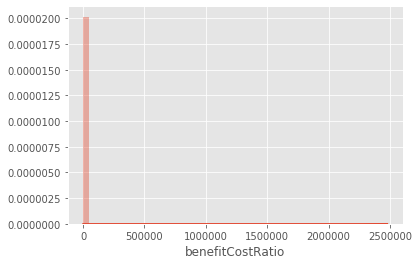

In [12]:
sns.distplot(df['benefitCostRatio'])

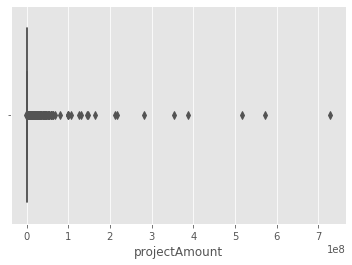

In [13]:
# Looks like projectAmount has outliers - Let's plot it
sns.boxplot(x=df['projectAmount'])

In [14]:
df['projectAmount'].sum()

24154158163.54

In [15]:
df['projectAmount'].median()

114895.5

In [16]:
# Do we have nulls?
df.isna().sum()

region                       0
stateNumberCode              0
programArea                  0
projectAmount               20
programFy                    0
granteeTribalIndicator    6936
benefitCostRatio             0
netValueBenefits          4921
Positive_ROI                 0
dtype: int64

In [17]:
df['projectAmount'].fillna(0.0, axis = 0, inplace=True)
df['projectAmount'].value_counts()

40000.000      186
50000.000      184
100000.000     139
20000.000      120
25000.000      119
              ... 
1252647.000      1
840671.000       1
40254.000        1
31066.670        1
573403.000       1
Name: projectAmount, Length: 24108, dtype: int64

In [18]:
df['netValueBenefits'].fillna(0.0, axis = 0, inplace=True)
df['netValueBenefits'].value_counts()

0.000          14662
21420.000        318
1.000            152
276000.000        96
175000.000        36
               ...  
775151.000         1
387575.000         1
1222617.000        1
3624869.000        1
16552.000          1
Name: netValueBenefits, Length: 13097, dtype: int64

In [19]:
df[(df['projectAmount']<0)]

,region,stateNumberCode,programArea,projectAmount,programFy,granteeTribalIndicator,benefitCostRatio,netValueBenefits,Positive_ROI
3795,5,27,HMGP,-1624776.000,1997,nan,0.000,0.000,0
6134,1,25,HMGP,-110696.000,1991,nan,0.000,0.000,0
22833,5,26,HMGP,-36500.000,1998,nan,0.000,0.000,0


In [20]:
# The outliers need to be addressed
df = df[(df['projectAmount']>0)]

In [21]:
df['granteeTribalIndicator'].fillna(0.0, axis = 0, inplace=True)
df['granteeTribalIndicator'].value_counts()

0.000    29314
1.000      262
Name: granteeTribalIndicator, dtype: int64

In [22]:
# Did we get all the nulls?
df.isna().sum()

region                    0
stateNumberCode           0
programArea               0
projectAmount             0
programFy                 0
granteeTribalIndicator    0
benefitCostRatio          0
netValueBenefits          0
Positive_ROI              0
dtype: int64

In [23]:
df['benefitCostRatio'] = df['benefitCostRatio'].astype('int64')
df['projectAmount'] = df['projectAmount'].astype('int64')
df['netValueBenefits'] = df['netValueBenefits'].astype('int64')
df['programFy'] = df['programFy'].astype('int64')
#df['granteeTribalIndicator'] = df['granteeTribalIndicator'].astype('int64')

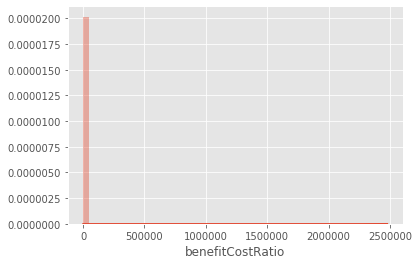

In [24]:
sns.distplot(df['benefitCostRatio'])

## Vizualizations

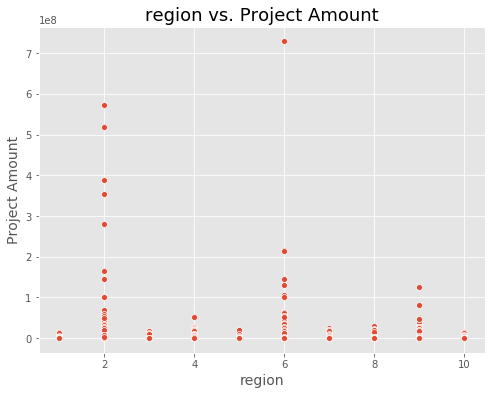

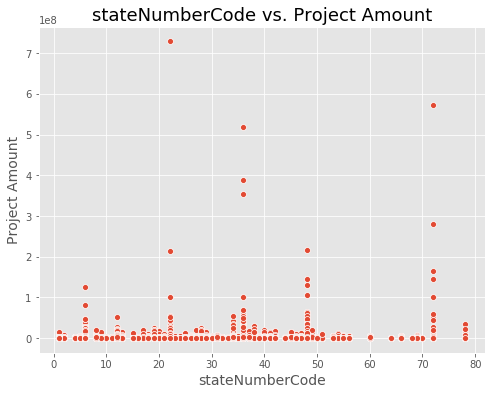

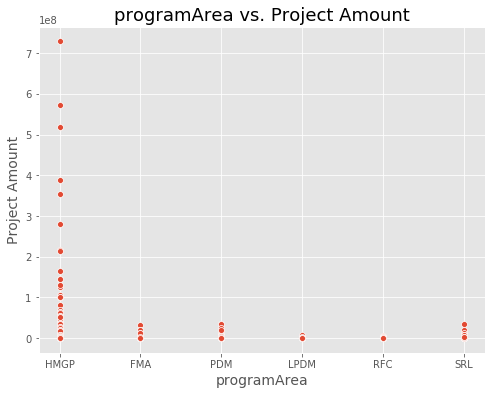

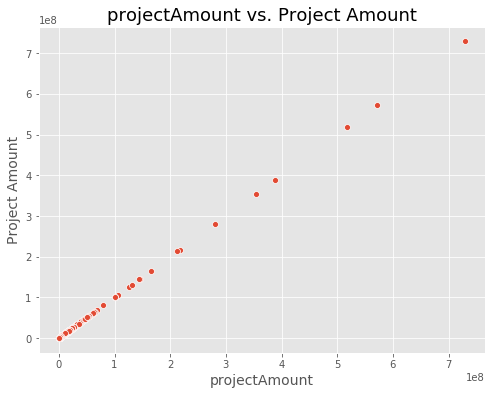

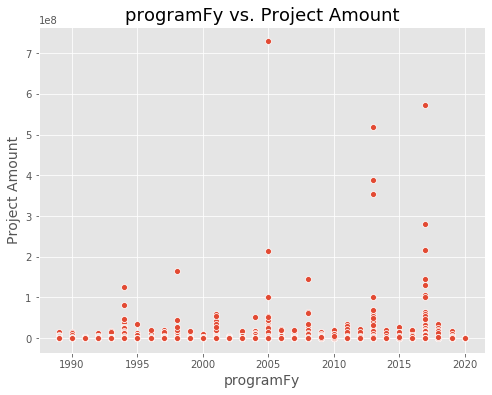

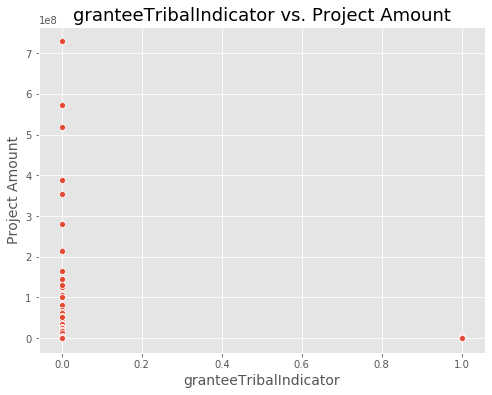

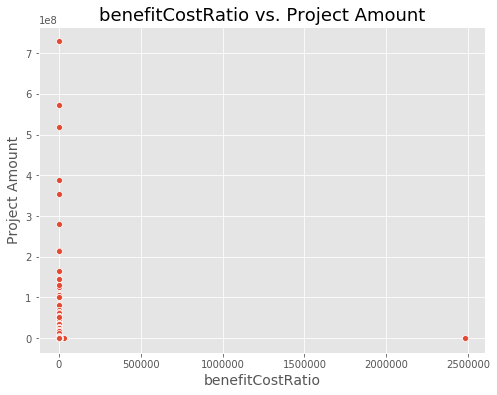

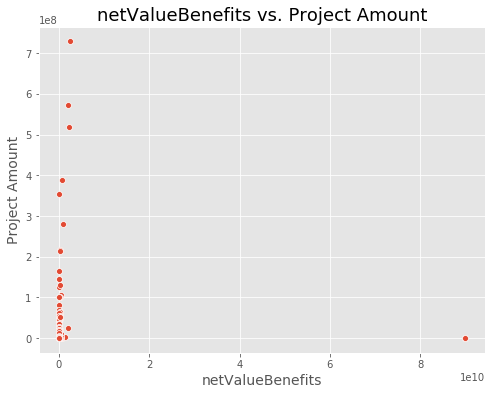

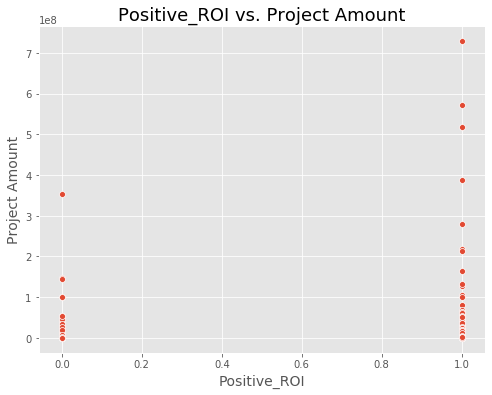

In [25]:
def scatterplot(col):
    ax = plt.figure(figsize = (8,6))
    ax = sns.scatterplot(x = df[col], y = df['projectAmount'])
    ax.set_title('{} vs. Project Amount'.format(col), fontsize = 18)
    ax.set_xlabel('{}'.format(col), fontsize = 14)
    ax.set_ylabel('Project Amount', fontsize = 14);

for col in df:

    scatterplot(col)

In [26]:
# Plotting Price with the categories:
def categorical_plots(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=col, y='projectAmount', data=df, palette="colorblind")
        ax.set_title(f"{col} vs projectAmount", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

In [27]:
categorical_plots(df)

As we can see from the following vizuals above SRL () are the most costly hazard mitigation area that is being spent on

# EDA Raw Data

In [28]:
df.region.value_counts()

4     8408
6     4163
5     2611
9     2496
7     2430
2     2163
3     2021
1     1964
8     1882
10    1438
Name: region, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29576 entries, 0 to 29627
Data columns (total 9 columns):
region                    29576 non-null int64
stateNumberCode           29576 non-null int64
programArea               29576 non-null object
projectAmount             29576 non-null int64
programFy                 29576 non-null int64
granteeTribalIndicator    29576 non-null float64
benefitCostRatio          29576 non-null int64
netValueBenefits          29576 non-null int64
Positive_ROI              29576 non-null int32
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 2.1+ MB


In [30]:
df.stateNumberCode.value_counts()

12    2633
6     1858
1     1646
48    1232
22    1155
40    1153
19     997
13     940
36     842
28     842
34     839
21     735
37     725
46     615
42     596
53     590
39     542
29     539
27     527
55     522
51     511
38     504
5      472
31     456
45     453
50     448
20     438
47     434
25     433
26     417
54     384
17     372
41     369
72     353
23     349
24     339
33     337
8      270
2      267
9      265
30     265
18     231
16     212
4      162
35     151
10     144
49     143
44     132
78     129
15     112
32     109
56      85
69      82
66      75
11      47
60      45
64      39
68       7
70       7
Name: stateNumberCode, dtype: int64

In [31]:
# Very important category as it shows why the mitigation is being done
df.programArea.value_counts()

HMGP    22497
PDM      3906
FMA      2581
LPDM      253
SRL       241
RFC        98
Name: programArea, dtype: int64

Text(0.5, 1.0, 'Program Area vs. Project Amount')

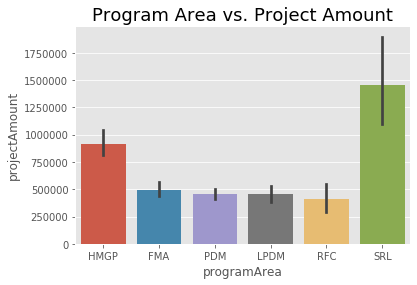

In [32]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

Text(0.5, 1.0, 'Program Area vs. Project Amount')

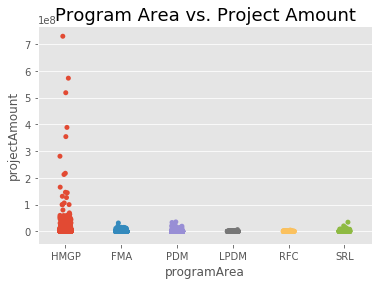

In [33]:
# Add swarmplot on top -its taking a lot of time?
ax = sns.barplot(x="programArea", y="projectAmount", data=df, estimator=np.median)
sns.stripplot(x="programArea", y="projectAmount", data=df)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

In [34]:
# Analysis for visual: 

In [35]:
df.projectAmount.value_counts()

40000      188
50000      185
100000     140
25000      120
20000      120
          ... 
373756       1
140286       1
3200000      1
23553        1
65536        1
Name: projectAmount, Length: 23949, dtype: int64

In [36]:
df.programFy.value_counts()

2011    2311
2017    1949
2005    1860
2008    1681
2013    1370
1998    1290
2009    1285
2010    1244
2007    1187
2004    1182
2016    1116
2001    1059
2003     976
2014     972
2018     937
2015     903
1997     903
1994     900
1996     846
2002     817
2012     662
1999     636
2000     597
2006     595
2019     593
1993     420
1992     369
1995     358
1990     241
1991     172
1989     132
2020      13
Name: programFy, dtype: int64

In [37]:
df.benefitCostRatio.value_counts()

0       14965
1        8400
2        2109
3        1157
4         680
        ...  
56          1
1080        1
105         1
121         1
55          1
Name: benefitCostRatio, Length: 120, dtype: int64

In [38]:
df.netValueBenefits.value_counts()

0          14641
21420        318
1            152
276000        96
552000        36
           ...  
2159860        1
54512          1
7570666        1
683239         1
362649         1
Name: netValueBenefits, Length: 13068, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29576 entries, 0 to 29627
Data columns (total 9 columns):
region                    29576 non-null int64
stateNumberCode           29576 non-null int64
programArea               29576 non-null object
projectAmount             29576 non-null int64
programFy                 29576 non-null int64
granteeTribalIndicator    29576 non-null float64
benefitCostRatio          29576 non-null int64
netValueBenefits          29576 non-null int64
Positive_ROI              29576 non-null int32
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 3.4+ MB


In [40]:
for col in df.columns:
    print(col, df[col].nunique())

region 10
stateNumberCode 59
programArea 6
projectAmount 23949
programFy 32
granteeTribalIndicator 2
benefitCostRatio 120
netValueBenefits 13068
Positive_ROI 2


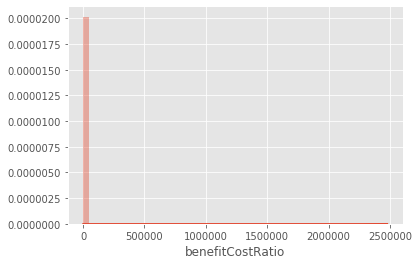

In [41]:
sns.distplot(df['benefitCostRatio'])

**From the distplot we can see that there is a large skew that needs to be addressed. We will further remove the extreme outliers in projectAmount.**

In [42]:
df.shape

(29576, 9)

Text(0.5, 1.0, 'Program Area vs. Project Amount')

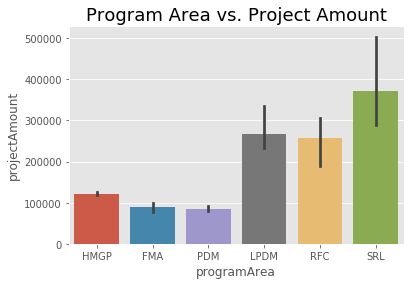

In [43]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df, estimator=np.median)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

Text(0.5, 1.0, 'Tribal Projects Program Amount')

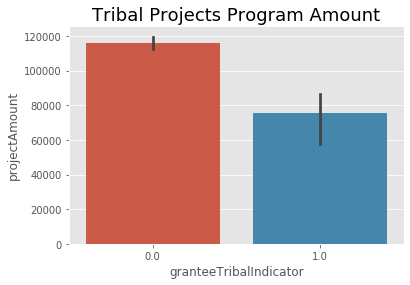

In [44]:
ax = sns.barplot(x="granteeTribalIndicator", y="projectAmount", data=df, estimator=np.median)
ax.set_title('Tribal Projects Program Amount', fontsize = 18)

In [45]:
df['region'] = df['region'].astype('category') 
df['stateNumberCode'] = df['stateNumberCode'].astype('category') 
df['programFy'] = df['programFy'].astype('category')

In [46]:
pd.get_dummies(df)

,projectAmount,granteeTribalIndicator,benefitCostRatio,netValueBenefits,Positive_ROI,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,stateNumberCode_1,stateNumberCode_2,stateNumberCode_4,stateNumberCode_5,stateNumberCode_6,stateNumberCode_8,stateNumberCode_9,stateNumberCode_10,stateNumberCode_11,stateNumberCode_12,stateNumberCode_13,stateNumberCode_15,stateNumberCode_16,stateNumberCode_17,stateNumberCode_18,stateNumberCode_19,stateNumberCode_20,stateNumberCode_21,stateNumberCode_22,stateNumberCode_23,stateNumberCode_24,stateNumberCode_25,stateNumberCode_26,stateNumberCode_27,stateNumberCode_28,...,stateNumberCode_72,stateNumberCode_78,programArea_FMA,programArea_HMGP,programArea_LPDM,programArea_PDM,programArea_RFC,programArea_SRL,programFy_1989,programFy_1990,programFy_1991,programFy_1992,programFy_1993,programFy_1994,programFy_1995,programFy_1996,programFy_1997,programFy_1998,programFy_1999,programFy_2000,programFy_2001,programFy_2002,programFy_2003,programFy_2004,programFy_2005,programFy_2006,programFy_2007,programFy_2008,programFy_2009,programFy_2010,programFy_2011,programFy_2012,programFy_2013,programFy_2014,programFy_2015,programFy_2016,programFy_2017,programFy_2018,programFy_2019,programFy_2020
0,402910,0.000,4,2969310,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,366071,0.000,1,961452,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,96965,0.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,5932500,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,34245,0.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29623,423000,0.000,1,9391485,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29624,1708540,0.000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
29625,2882727,0.000,1,2927736,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29626,21000,0.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


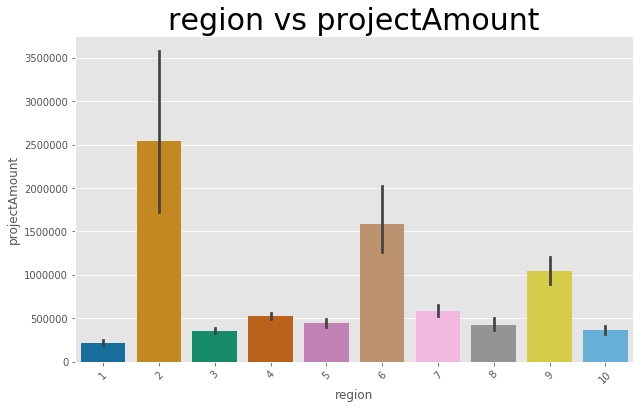

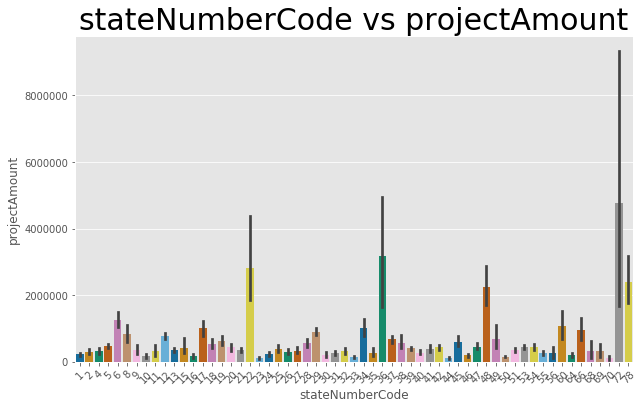

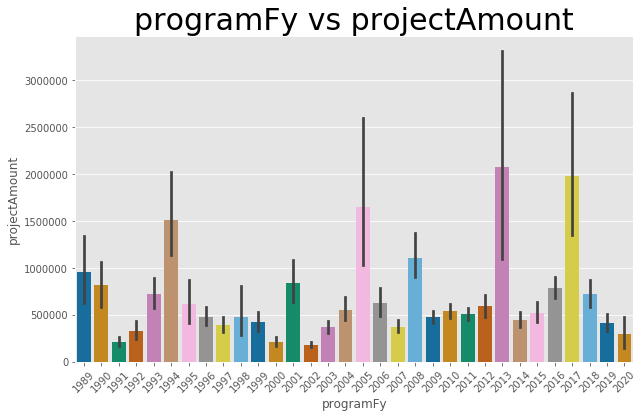

In [47]:
categorical_plots(df)

In [48]:
## Notes: We could use these categorical plots in PP to show raw data information

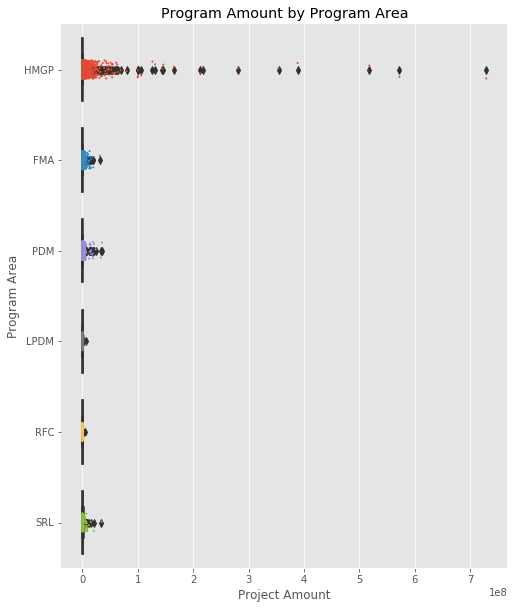

In [49]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="projectAmount", y="programArea", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="projectAmount", y="programArea", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Program Area")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [50]:
## Notes: 

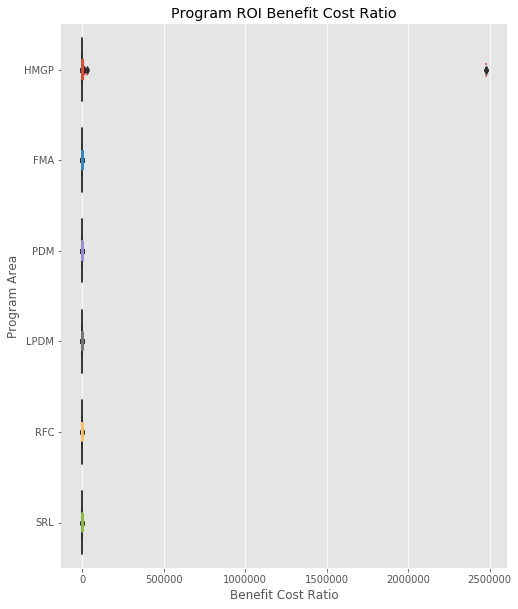

In [51]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="benefitCostRatio", y="programArea", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="benefitCostRatio", y="programArea", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Benefit Cost Ratio")
ax.set(title="Program ROI Benefit Cost Ratio")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [52]:
## Notes: Extreme values in HMGP

In [53]:
# The outliers need to be addressed
df = df[(df['benefitCostRatio']<5000)]

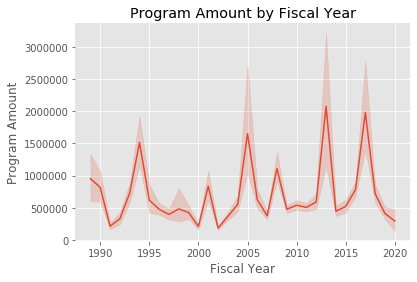

In [54]:
ax = sns.lineplot(x="programFy", y="projectAmount",
             data=df)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Amount")
ax.set(xlabel="Fiscal Year")
ax.set(title="Program Amount by Fiscal Year")
sns.despine(left=True)

In [55]:
## Notes: Spikes in 2013 & 2016

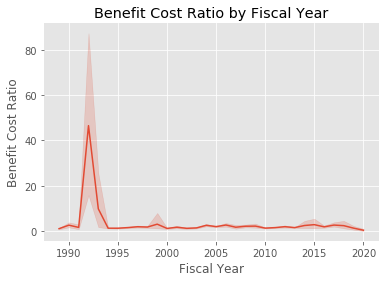

In [56]:
ax = sns.lineplot(x="programFy", y="benefitCostRatio",
             data=df)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Benefit Cost Ratio")
ax.set(xlabel="Fiscal Year")
ax.set(title="Benefit Cost Ratio by Fiscal Year")
sns.despine(left=True)

In [57]:
## Notes: Ben Cost Ratio spike in 1993? Unsure why but interesting that it stays low after that

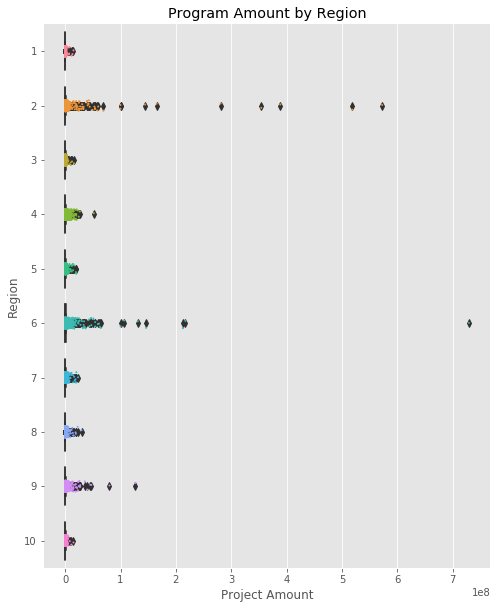

In [58]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="projectAmount", y="region", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="projectAmount", y="region", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Region")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [59]:
## Notes: Extreme values in regions 6, 2, 8

In [60]:
#sns.distplot(x='projectAmount, col="Positive_ROI", kde=True)

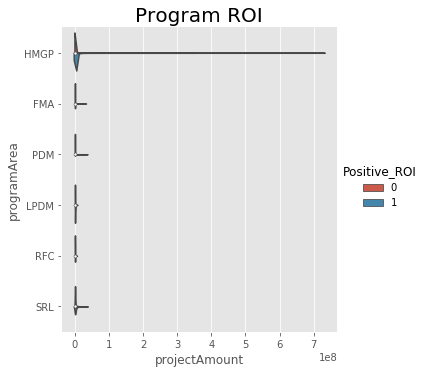

In [61]:
ax = sns.catplot(x="projectAmount", y="programArea", hue="Positive_ROI",
            kind="violin", split=True, pallete="colorblind", data=df)
plt.title('Program ROI', fontsize=(20))
plt.show()

In [62]:
## Notes: Violin plot may not be best to visualize Program ROI

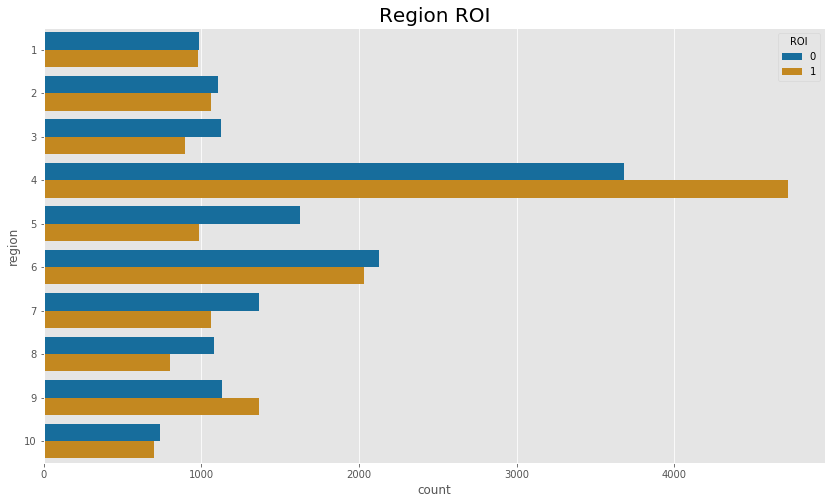

In [63]:
#Plot region vs. ROI
plt.figure(figsize=(14, 8))
ax = sns.countplot(y=df['region'], hue=df['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
ax.legend(title="ROI")
plt.title('Region ROI', fontsize=(20))
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [64]:
## Notes: Region 4 has most program counts
# Let's turn this sideways

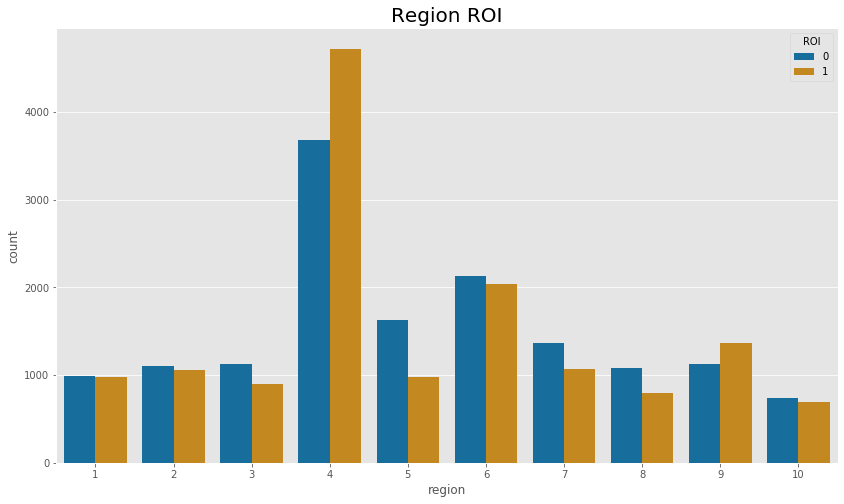

In [65]:
#Plot region vs. ROI
plt.figure(figsize=(14, 8))
ax = sns.countplot(x=df['region'], hue=df['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
ax.legend(title="ROI")
plt.title('Region ROI', fontsize=(20))
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [66]:
## Notes: Much easier to see the results
# Add to PP

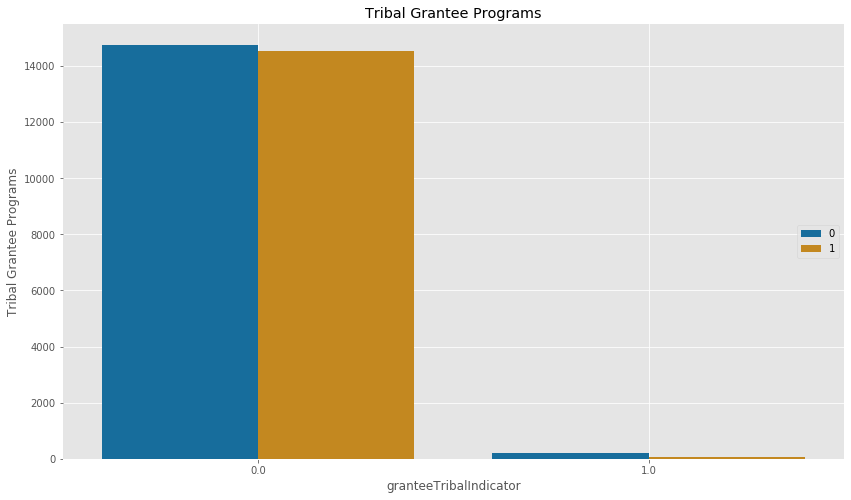

In [67]:
# Plot tribal indicator projects vs. ROI
plt.figure(figsize=(14, 8))
ax = sns.countplot(x=df['granteeTribalIndicator'], hue=df['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Tribal Grantee Programs")
ax.set(title="Tribal Grantee Programs")
sns.despine(left=True)
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [68]:
## Note this shows us the data viz for tribal groups but not many programs in tribal so hard to vizualize

In [69]:
# Dropping the tribal indicator as there aren't 
# that many tribal projects in our dataset to use for modeling
df.drop(columns=['granteeTribalIndicator'], inplace=True)

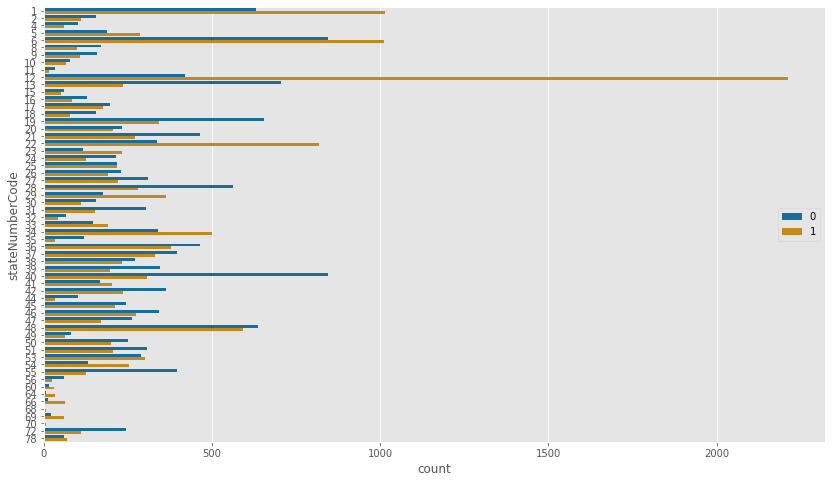

In [70]:
#Plot stateNumberCode vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df['stateNumberCode'], hue=df['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [71]:
# It is very hard to viz the states information as there are many.
# A map would be good to make to viz this

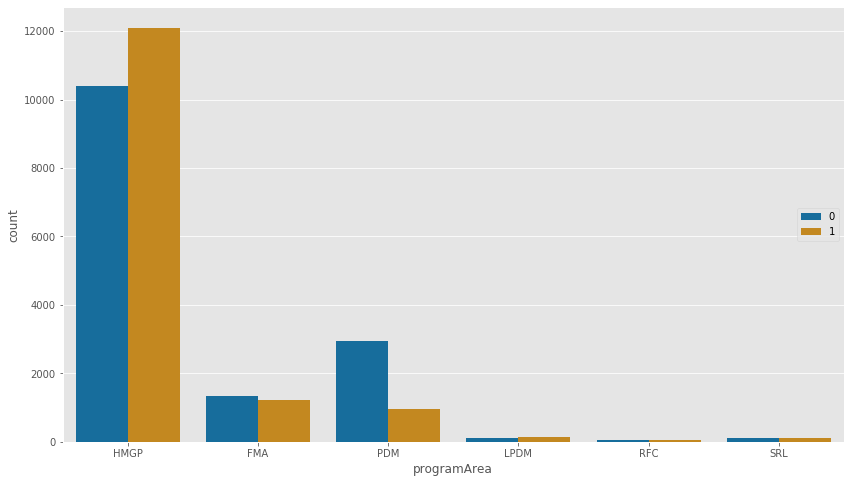

In [72]:
#Plot programArea vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='programArea', hue='Positive_ROI', palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [73]:
## Notes: Need to come back to find out the issue on this

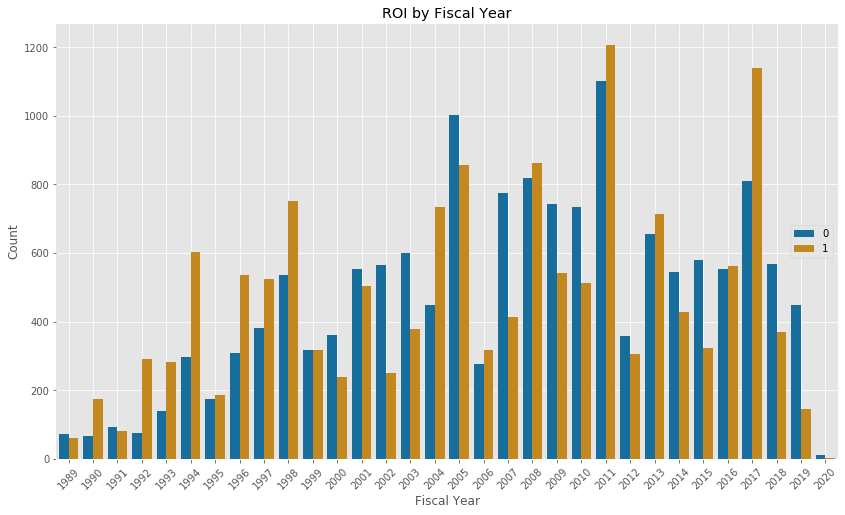

In [74]:
#Plot programFy vs. ROI
plt.figure(figsize=(14, 8))
ax = sns.countplot(x=df['programFy'], hue=df['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.xticks(rotation=45)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Count")
ax.set(xlabel="Fiscal Year")
ax.set(title="ROI by Fiscal Year")
sns.despine(left=True)

plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [75]:
# This vizual can show us the trends in ROI over fiscal year
# Use for PP

# Outlier Removal

In [76]:
# After researching outlier removal 
# and exploring our data it is best to do IQR type outlier removal methods

def outliersiqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    return outliers

In [77]:
# Function to make an outlier column which we will then remove outliers from
def outlierscolumn(df, columns, verbose=True):
    new_df = df.copy()
    for col in columns:
        outliers = outliersiqr(new_df[col])
        if verbose:
            print(f'{outliers.sum()} outliers found in {col}')
        new_df[f'{col}_outliers'] = outliers
    return new_df

In [78]:
# Feeding in the numerical columns for identifying outliers
num_cols = list(df.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
df2 = outlierscolumn(df, num_cols)

3833 outliers found in projectAmount
4097 outliers found in benefitCostRatio
4557 outliers found in netValueBenefits
0 outliers found in Positive_ROI


In [79]:
df2.head()

,region,stateNumberCode,programArea,projectAmount,programFy,benefitCostRatio,netValueBenefits,Positive_ROI,projectAmount_outliers,benefitCostRatio_outliers,netValueBenefits_outliers,Positive_ROI_outliers
0,6,48,HMGP,402910,2011,4,2969310,1,False,True,True,False
1,5,18,HMGP,366071,2011,1,961452,1,False,False,False,False
2,7,19,HMGP,96965,2011,0,0,0,False,False,False,False
3,2,36,HMGP,5932500,2011,0,0,0,True,False,False,False
4,7,19,HMGP,34245,2011,0,0,0,False,False,False,False


In [80]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['projectAmount_outliers',
 'benefitCostRatio_outliers',
 'netValueBenefits_outliers',
 'Positive_ROI_outliers']

In [81]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
for col in outliercols:
    df2 = df2[(df2[col]==False)]
df2.shape

(21860, 12)

In [82]:
# Dropping the outlier columns that were added
for col in outliercols:
    df2.drop(columns=[col], axis=1, inplace=True)

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21860 entries, 1 to 29627
Data columns (total 8 columns):
region              21860 non-null category
stateNumberCode     21860 non-null category
programArea         21860 non-null object
projectAmount       21860 non-null int64
programFy           21860 non-null category
benefitCostRatio    21860 non-null int64
netValueBenefits    21860 non-null int64
Positive_ROI        21860 non-null int32
dtypes: category(3), int32(1), int64(3), object(1)
memory usage: 1008.2+ KB


In [84]:
df=df2

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21860 entries, 1 to 29627
Data columns (total 8 columns):
region              21860 non-null category
stateNumberCode     21860 non-null category
programArea         21860 non-null object
projectAmount       21860 non-null int64
programFy           21860 non-null category
benefitCostRatio    21860 non-null int64
netValueBenefits    21860 non-null int64
Positive_ROI        21860 non-null int32
dtypes: category(3), int32(1), int64(3), object(1)
memory usage: 1008.2+ KB


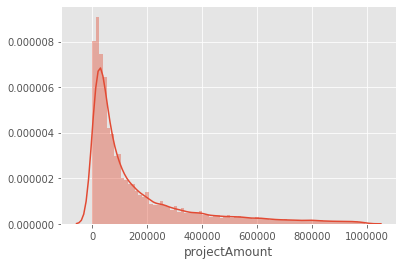

In [86]:
sns.distplot(df['projectAmount'], bins='auto')

In [87]:
df.shape

(21860, 8)

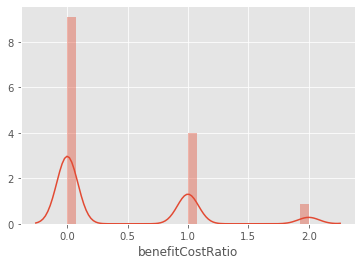

In [88]:
sns.distplot(df['benefitCostRatio'])

In [89]:
# We've now removed all of the extreme outliers in benefit cost ratio

# EDA After Outlier Removal

Text(0.5, 1.0, 'Program Area vs. Project Amount')

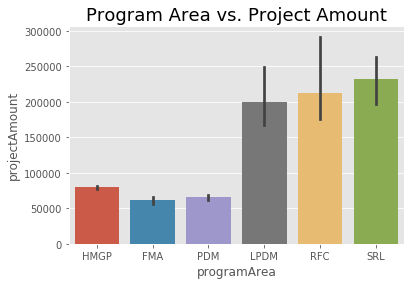

In [90]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df, estimator=np.median)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

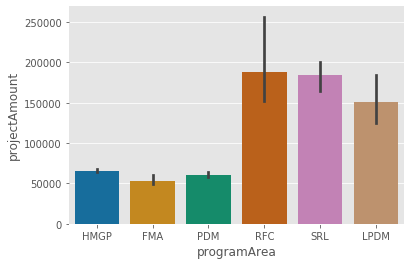

In [129]:
# Initialize the figure with a logarithmic x axis
#f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.barplot(y="projectAmount", x="programArea", data=df,
            palette="colorblind", estimator=np.median)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Program Area")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [92]:
## Note: This is a start on this vizual but very hard to vizualize with the points there
# Will try to get the swarmplot to work

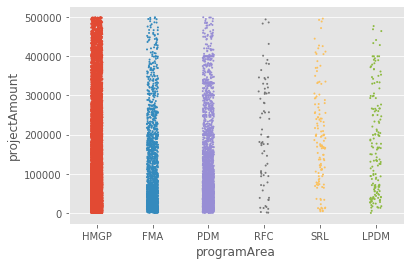

In [128]:
# Add in points to show each observation
sns.stripplot(y="projectAmount", x="programArea", data=df,
              size=2, linewidth=0)

[Text(0.5, 1.0, 'Program ROI Benefit Cost Ratio')]

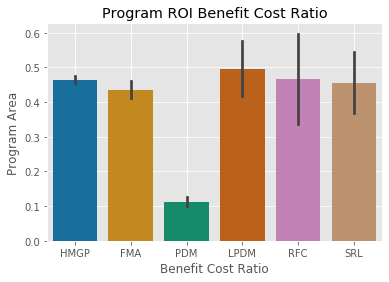

In [93]:
# Plot the orbital period with horizontal boxes
ax = sns.barplot(y="benefitCostRatio", x="programArea", data=df,
            palette="colorblind")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Benefit Cost Ratio")
ax.set(title="Program ROI Benefit Cost Ratio")
#sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [94]:
## Note: This vizualization will work well for the PP

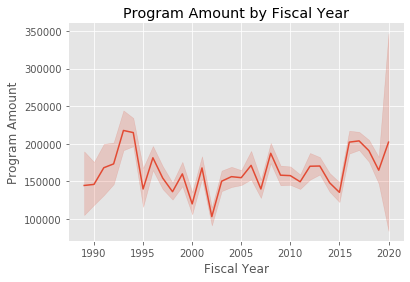

In [95]:
ax = sns.lineplot(x="programFy", y="projectAmount",
             data=df)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Amount")
ax.set(xlabel="Fiscal Year")
ax.set(title="Program Amount by Fiscal Year")
sns.despine(left=True)

In [96]:
## Note: Amount by year
# Will add to PP
# Question from James about light red area

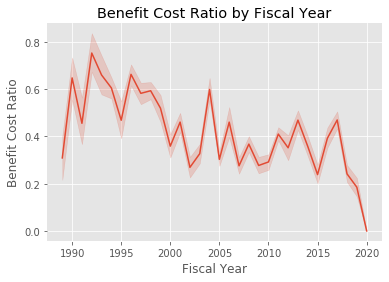

In [97]:
ax = sns.lineplot(x="programFy", y="benefitCostRatio",
             data=df)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Benefit Cost Ratio")
ax.set(xlabel="Fiscal Year")
ax.set(title="Benefit Cost Ratio by Fiscal Year")
sns.despine(left=True)

In [98]:
## Note: Benefit Cost Ratio goes down after 2016
# Will add to PP

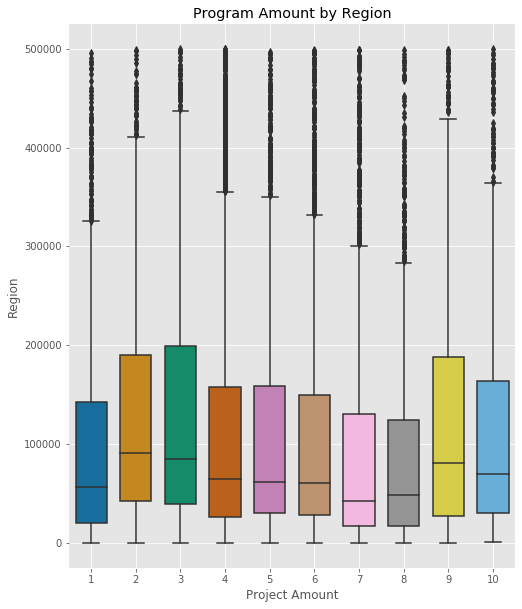

In [134]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(y="projectAmount", x="region", data=df,
            width=0.7, palette="colorblind")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Region")
sns.despine(left=True)

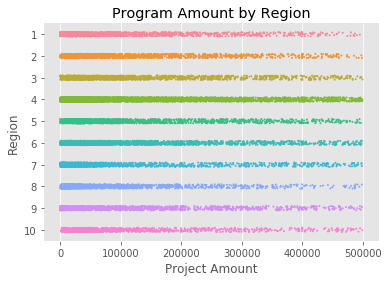

In [132]:
# Add in points to show each observation
ax = sns.stripplot(x="projectAmount", y="region", data=df,
              size=2, linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Region")
sns.despine(left=True)

In [100]:
## Note: May ve nire helpful to see this vizual with a bar and swarm plot

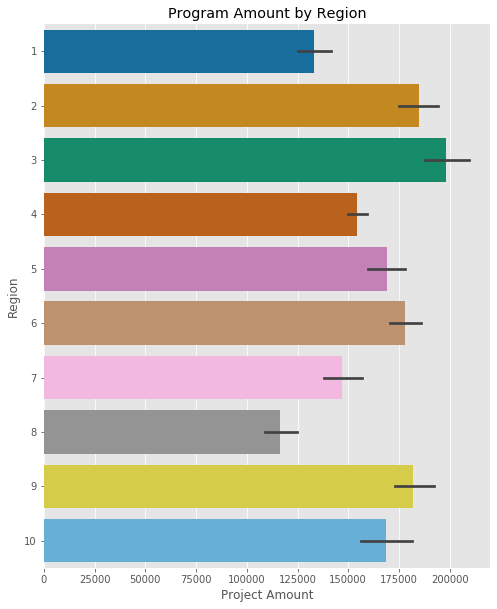

In [101]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.barplot(x="projectAmount", y="region", data=df,
            palette="colorblind")

# Add in points to show each observation
#sns.swarmplot(x="projectAmount", y="region", data=df,
               #size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Region")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [102]:
## Note: Takes a very long time to load but should distribution withouth covering up our barplot too much
# Will add to PP

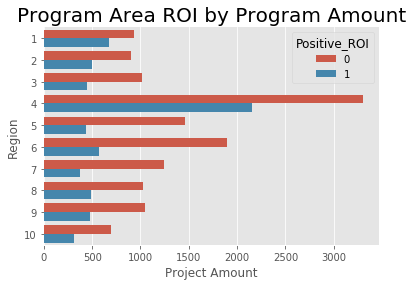

In [140]:
ax = sns.countplot(y="region", hue="Positive_ROI",data=df)
plt.title('Program Area ROI by Program Amount', fontsize=(20))

# Tweak the visual presentation
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
sns.despine(left=True)

plt.show()

In [104]:
## Note: We will also want to make this in case we want to use but the barplot/swarmplot if possible

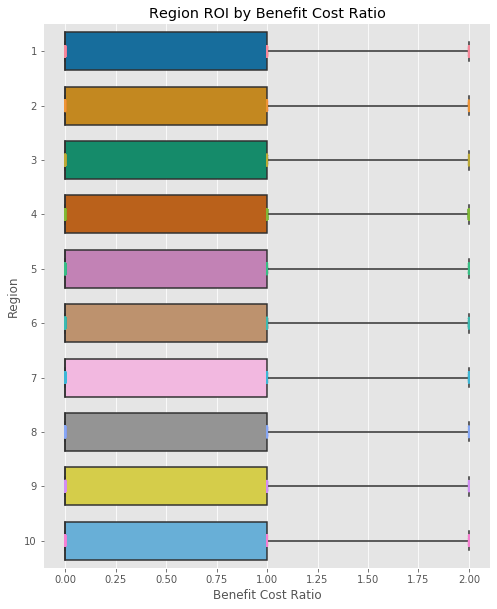

In [105]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="benefitCostRatio", y="region", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="benefitCostRatio", y="region", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Benefit Cost Ratio")
ax.set(title="Region ROI by Benefit Cost Ratio")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [106]:
## Note: Something is going wrong here that I need to figure out why
# The reason for this may be because the benefit cost ratio is binned to be from 0, 1, 2

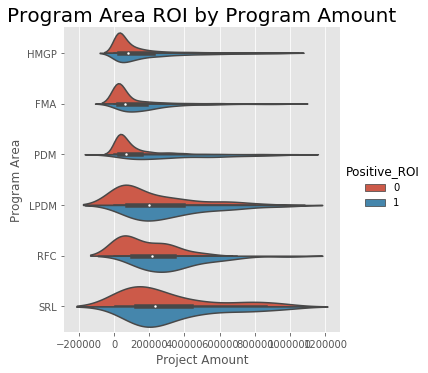

In [107]:
ax = sns.catplot(x="projectAmount", y="programArea", hue="Positive_ROI",
            kind="violin", split=True, pallete="colorblind", data=df)
plt.title('Program Area ROI by Program Amount', fontsize=(20))

# Tweak the visual presentation
ax.set(ylabel="Program Area")
ax.set(xlabel="Project Amount")
sns.despine(left=True)

plt.show()

In [108]:
## Violin plot may not be best to convey the message, we will try to make bar/swarm

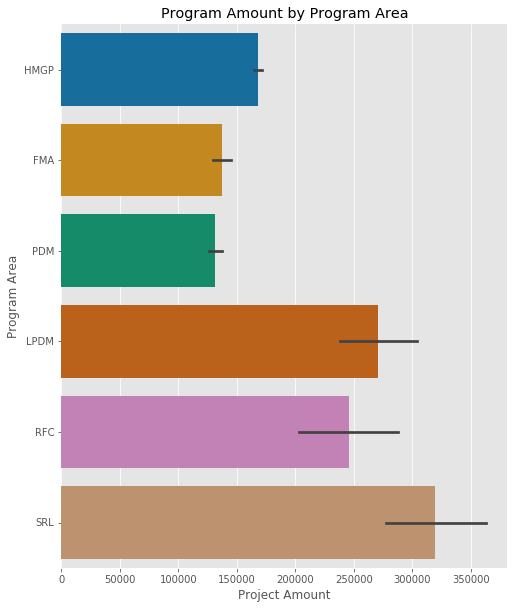

In [109]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

sns.barplot(x="projectAmount", y="programArea", data=df,
            palette="colorblind")

# Add in points to show each observation
#sns.swarmplot(x="projectAmount", y="programArea", data=df,
             # size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Program Area")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Program Area")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [110]:
## Note: Vizual would work for PP, will decide if it makes the cut

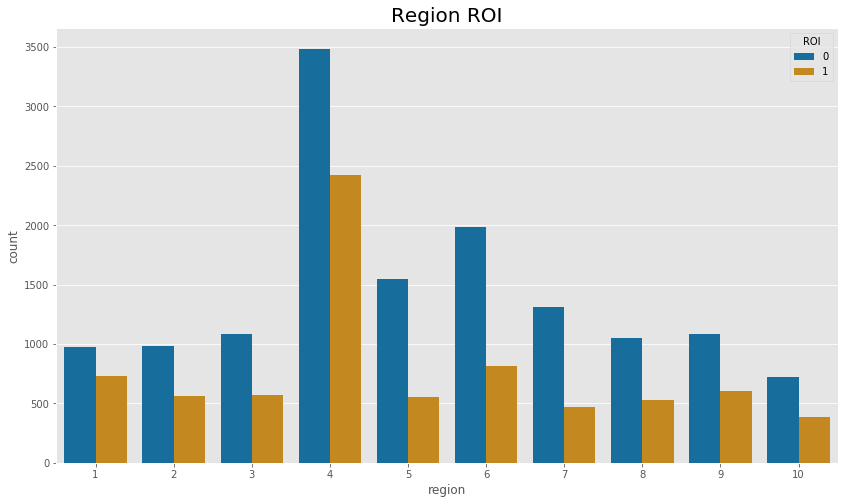

In [111]:
#Plot region vs. ROI
plt.figure(figsize=(14, 8))
ax = sns.countplot(x=df2['region'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
ax.legend(title="ROI")
plt.title('Region ROI', fontsize=(20))
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [112]:
## This vizual clearly shows the region counts and would be good for audience

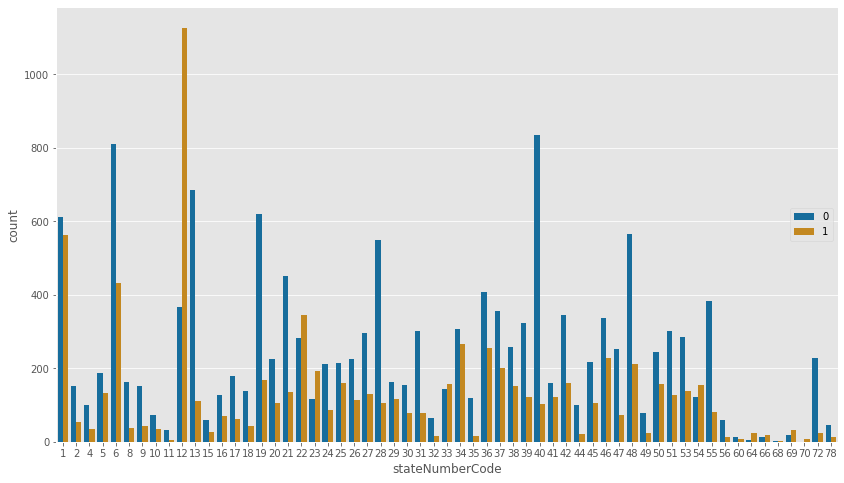

In [113]:
#Plot stateNumberCode vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(x=df2['stateNumberCode'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [114]:
## Note: Wish there was a better way to vizualize this but with so many states it is very difficult

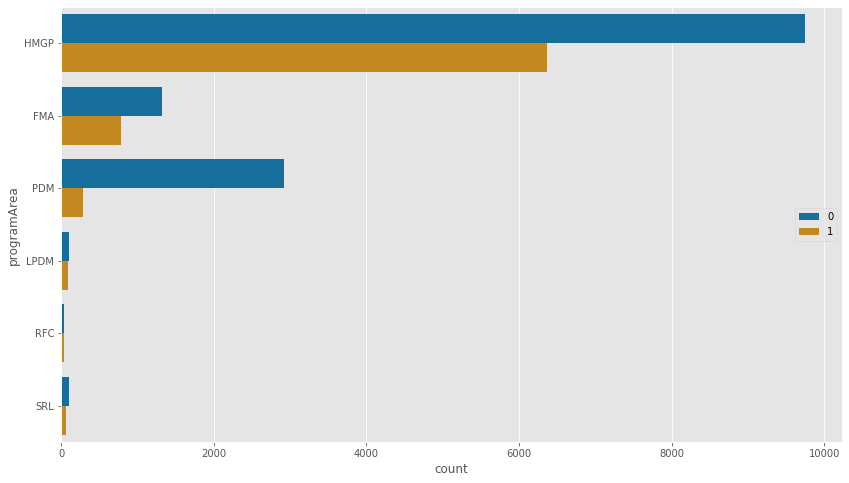

In [115]:
#Plot programArea vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(data=df2, y='programArea', hue='Positive_ROI', palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [116]:
## Note: There are many more HMGP programs than any other so it is hard to intepret

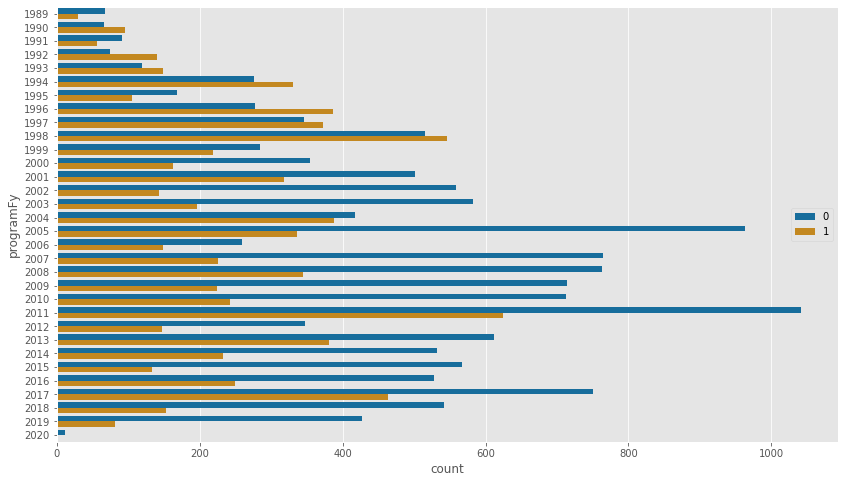

In [117]:
#Plot programFy vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['programFy'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [118]:
## Hard to read unless we make it a line plot to see progress over time

In [119]:
# The outliers need to be addressed
df = df[(df['projectAmount']<500000)]

In [124]:
median = int(df['projectAmount'].median())
median

64969

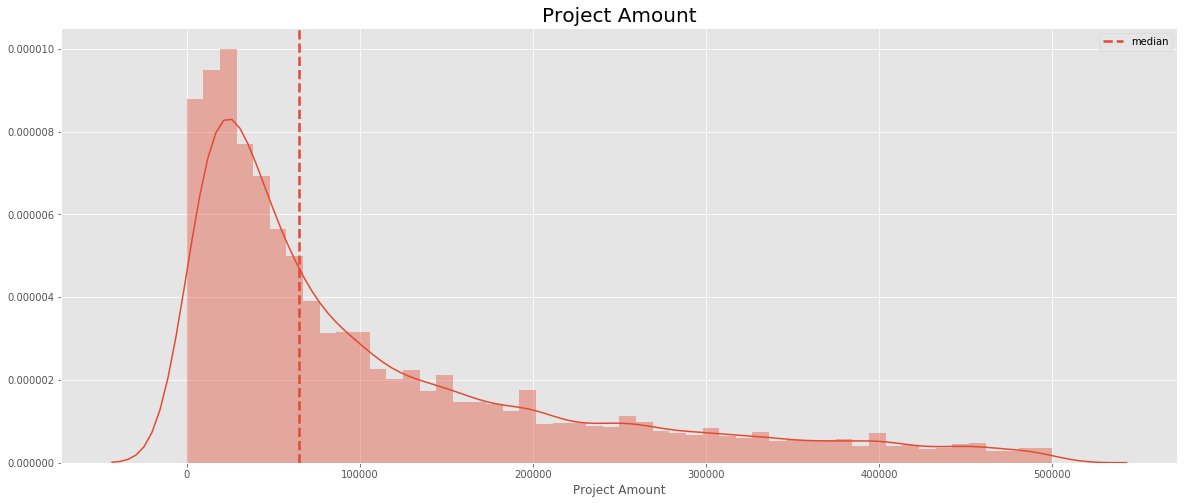

In [126]:
plt.figure(figsize=(20, 8))
ax = sns.distplot(df['projectAmount'], bins='auto')
plt.title('Project Amount', fontsize=(20))
ax.set(xlabel="Project Amount")
plt.axvline(x=median, linestyle='--', linewidth=2.5, label='median')
plt.legend()
plt.show()

In [ ]:
## Use in PP to show distribution

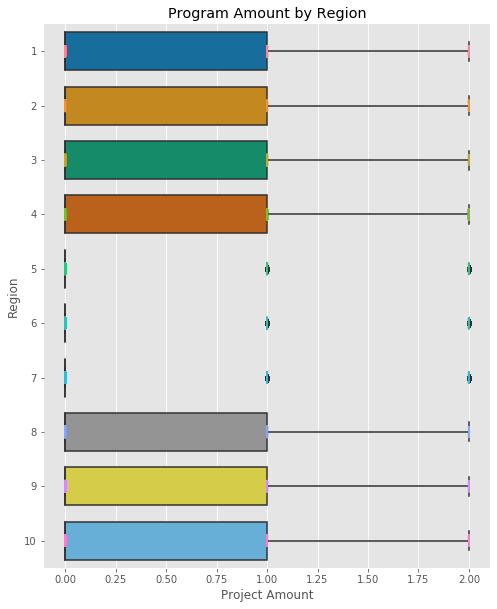

In [127]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="benefitCostRatio", y="region", data=df,
            width=0.7, palette="colorblind")

# Add in points to show each observation
sns.stripplot(x="benefitCostRatio", y="region", data=df,
              size=2, linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Region")
ax.set(xlabel="Project Amount")
ax.set(title="Program Amount by Region")
sns.despine(left=True)

# https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [ ]:
## Note: There isn't much to convey in vizual as a box plot is hard to understand

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.drop(columns=['benefitCostRatio'], inplace=True)

In [ ]:
df.head()

# Logistic Model #1

### Supervised Machine Learning Algorithm that can be used for Classification or Regression. Used to predict the categorical dependent variable with the help of independent variables.

In [ ]:
#Split features and target
X = df.drop(columns=['Positive_ROI'], axis=1)
y = df['Positive_ROI']

# Normalizing the data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
#Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Create function to easily build models and display results
def build_model(classifier, X_train, X_test, y_train,  y_test):
    '''Build classification model, returning classification report, train and test accuracy, and confusion matrix.
    
    Keyword arguments: 
    classifier -- classification algorithm
    predictors -- X, features
    labels -- y, target
    '''
    
    #Create variables that can be called outside function
    #build_model.X_train = X_train
    #build_model.X_test = X_test
    #build_model.y_train = y_train
    #build_model.y_test = y_test
    
    #Fit model
    classifier.fit(X_train, y_train)
    #score = np.mean(cross_val_score(classifier, X, y, cv=5, scoring='recall'))

    #Create predictions
    y_hat_train = classifier.predict(X_train)
    y_hat_test = classifier.predict(X_test)
    
    #Create variables that can be called outside function
    #build_model.y_hat_train = y_hat_train
    #build_model.y_hat_test = y_hat_test
    
    #Print classification report
    print('Train Classification Report\n', classification_report(y_train, y_hat_train))
    print('Test Classification Report\n', classification_report(y_test, y_hat_test))
    
    print('Train Accuracy:', round(accuracy_score(y_train, y_hat_train), 3))
    print('Test Accuracy:', round(accuracy_score(y_test, y_hat_test), 3))
    #print('Cross Validation Recall', round(score, 3))
    
    #Create a results dataframe
    #results = pd.DataFrame([[str(model), round(accuracy_score(y_train, y_hat_train), 3), 
     #                        round(accuracy_score(y_test, y_hat_test), 3), round(score, 3)]], 
      #                    columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'Cross_Val_Recall'])
    #build_model.results = results
    
    #Plot Confusion Matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
    plot_confusion_matrix(classifier, X_train, y_train,
                     cmap=plt.cm.Blues, ax=axes[0], normalize='true')
    fig.suptitle('Train & Test Confusion Matrices', fontsize=16);
    
    plot_confusion_matrix(classifier, X_test, y_test,
                     cmap=plt.cm.Blues, ax=axes[1], normalize='true')
    plt.subplots_adjust(wspace=0.4)
    return classifier    

In [ ]:
log_reg = LogisticRegression()
build_model(log_reg, X_train, X_test, y_train,  y_test)

## Results:
- Train Accuracy: 0.946
- Test Accuracy: 0.944

>**We can see that we have some columns/features that are highly correlated including projectAmount, which is used to calculate the Positive ROI and netValueBenefits which has the same issue of correlation. Because of this we will delete these two columns**

# Logistic Model #2

In [ ]:
df.drop(columns=['projectAmount', 'netValueBenefits'], inplace=True)

In [ ]:
df.head()

In [ ]:
# QQ plot to see if our data is linear
fig1 = plt.figure(figsize = (12,6))
fig1 = sm.graphics.qqplot(model1.resid,fit=True, line='45');

In [ ]:
# Coment on qq plot
# R-squared .4

In [ ]:
log_reg_2 = LogisticRegressionCV()
build_model(log_reg_2, X_train, X_test, y_train,  y_test)

>**To note: Do this model do better than our first model?
-It did slightly better than the previous model but only difference is 0.1 increase in our training data.**

**No changes have occurred because the only thing that we have changed is removing two variables that were highly correlated to our target.**

# Baye's Classification Model

## Classifies based on conditional probabilities of finding certain features

In [ ]:
bayesmodel = GaussianNB()
build_model(bayesmodel, X_train, X_test, y_train,  y_test)

>**This model performs worse than our previous models and confusion matrix is not better as well.**

# Multinomial Bayes Model

## Classifies based on conditional probabilities, splits based on Gini/entropy


In [ ]:
descisionmodel = DecisionTreeClassifier()
build_model(descisionmodel, X_train, X_test, y_train,  y_test)

>**This model performs incredibly well with a train accuracy of 1.0 and test accuracy of 0.983.**

# Random Forest Model

## Uses multiple decision trees to create a "forest"; each tree uses a random set of sample features

In [ ]:
randomforestmodel = RandomForestClassifier()
build_model(randomforestmodel, X_train, X_test, y_train,  y_test)

>**This model performs better than all other previous models and confusion matrix with training score of 1.0 and test accuracy of 0.991.**

# XGBoost Model


## Stands for “Extreme Gradient Boosting”. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
xgboostmodel = xgboost.XGBClassifier()
build_model(xgboostmodel, X_train, X_test, y_train,  y_test)

>**This model performs best in that the training score is 0.989 and test accuracy of 0.99.**

# Conclusions

- Program Areas
    - More funds should be allocated to hazard mitigation in all categories of hazard mitigation with the HMGP being the program of highest ROI
- Regions
    - Certain areas of the US are more prone to natural disasters and need more funding for hazard mitigation including 1, 2, 4, and 9 having the best ROI
    - Regions 6 & 7 having the lowest ROI
- Program Costs & ROI
    - The costs of COVID-19 surpass all categories of natural disaster recovery costs and were unprecedented
        - There could have been further preparation and in the future more funding can be allocated to research and hazard mitigation for biological disasters. 


**Less common Natural Disaster Preparedness**

- The costs of COVID-19 surpass all categories of natural disaster recovery costs**

- Volcanoes were second highest cost even though they are less common natural disaster**
